# **AI TECH INSTITUTE** · *Intermediate AI & Data Science*
### Week 04 · Notebook 05 — Correlation and Relationships
**Instructor:** Amir Charkhi  |  **Goal:** Discover hidden relationships in your data and avoid the correlation-causation trap.

> Format: short theory → quick practice → build understanding → mini-challenges.


---
## Learning Objectives
- Master correlation vs causation (the eternal data science battle!)
- Calculate and interpret correlation coefficients like a pro
- Create stunning correlation matrices and heatmaps
- Understand Anscombe's Quartet and why visualization saves lives
- Identify different types of relationships in your data

## 1. The Correlation Fundamentals
**Your relationship detector**: Correlation tells you how strongly two variables dance together!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set style for nice plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (8, 4)
%matplotlib inline

In [4]:
# Correlation cheat sheet
correlation_guide = {
    "+1.0": "🎯 Perfect positive - as X goes up, Y goes up perfectly",
    "+0.8": "💪 Strong positive - X and Y move together strongly",
    "+0.5": "👍 Moderate positive - noticeable relationship",
    "+0.2": "🤏 Weak positive - barely there",
    "0.0": "🤷 No linear relationship - completely independent",
    "-0.2": "🤏 Weak negative - barely opposite",
    "-0.5": "👎 Moderate negative - one goes up, other goes down",
    "-0.8": "💥 Strong negative - strong opposite relationship",
    "-1.0": "🎯 Perfect negative - exact opposites"
}

print("📊 Correlation Strength Guide:")
for corr, meaning in correlation_guide.items():
    print(f"   {corr:>4}: {meaning}")
    
print("\n⚠️  REMEMBER: Correlation ≠ Causation!")

📊 Correlation Strength Guide:
   +1.0: 🎯 Perfect positive - as X goes up, Y goes up perfectly
   +0.8: 💪 Strong positive - X and Y move together strongly
   +0.5: 👍 Moderate positive - noticeable relationship
   +0.2: 🤏 Weak positive - barely there
    0.0: 🤷 No linear relationship - completely independent
   -0.2: 🤏 Weak negative - barely opposite
   -0.5: 👎 Moderate negative - one goes up, other goes down
   -0.8: 💥 Strong negative - strong opposite relationship
   -1.0: 🎯 Perfect negative - exact opposites

⚠️  REMEMBER: Correlation ≠ Causation!


## 2. Creating Perfect Examples

In [5]:
# Generate data with different correlation strengths
np.random.seed(42)
n = 100
x = np.random.normal(0, 1, n)

# Create different relationships
perfect_pos = x + 0.01 * np.random.normal(0, 0.1, n)  # Almost perfect
strong_pos = x + 0.5 * np.random.normal(0, 1, n)      # Strong positive  
moderate_pos = x + 1.2 * np.random.normal(0, 1, n)    # Moderate positive
no_corr = np.random.normal(0, 1, n)                   # No correlation
strong_neg = -x + 0.5 * np.random.normal(0, 1, n)     # Strong negative

# Calculate actual correlations
correlations = {
    'Perfect Positive': np.corrcoef(x, perfect_pos)[0,1],
    'Strong Positive': np.corrcoef(x, strong_pos)[0,1],
    'Moderate Positive': np.corrcoef(x, moderate_pos)[0,1],
    'No Correlation': np.corrcoef(x, no_corr)[0,1],
    'Strong Negative': np.corrcoef(x, strong_neg)[0,1]
}

print("🎲 Generated Correlation Examples:")
for name, corr in correlations.items():
    print(f"   {name:<18}: r = {corr:+.3f}")

🎲 Generated Correlation Examples:
   Perfect Positive  : r = +1.000
   Strong Positive   : r = +0.885
   Moderate Positive : r = +0.571
   No Correlation    : r = -0.136
   Strong Negative   : r = -0.906


C:\Users\alish\AppData\Local\Temp\ipykernel_9068\1921087700.py:26: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  plt.tight_layout()
C:\Users\alish\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


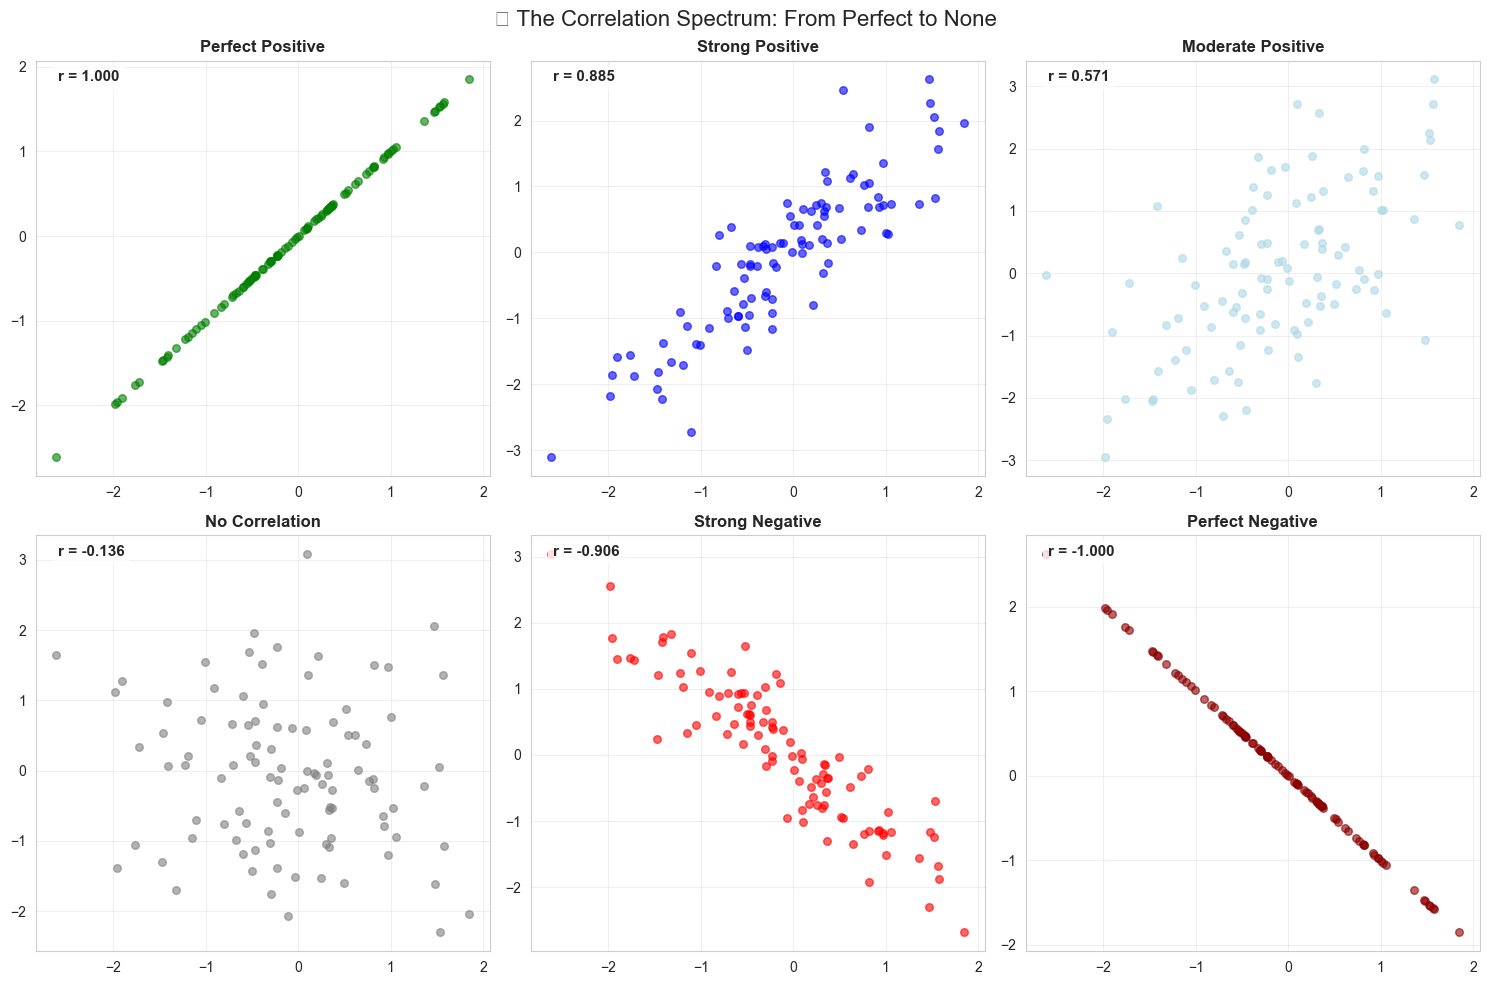

In [6]:
# Visualize the correlation spectrum
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

datasets = [
    (x, perfect_pos, 'Perfect Positive', 'green'),
    (x, strong_pos, 'Strong Positive', 'blue'),
    (x, moderate_pos, 'Moderate Positive', 'lightblue'),
    (x, no_corr, 'No Correlation', 'gray'),
    (x, strong_neg, 'Strong Negative', 'red'),
    (x, -x, 'Perfect Negative', 'darkred')
]

for i, (x_data, y_data, title, color) in enumerate(datasets):
    axes[i].scatter(x_data, y_data, alpha=0.6, color=color, s=30)
    axes[i].set_title(title, fontsize=12, fontweight='bold')
    axes[i].grid(True, alpha=0.3)
    
    # Add correlation coefficient
    r = np.corrcoef(x_data, y_data)[0,1]
    axes[i].text(0.05, 0.95, f'r = {r:.3f}', transform=axes[i].transAxes, 
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                fontsize=11, fontweight='bold')

plt.suptitle('🎯 The Correlation Spectrum: From Perfect to None', fontsize=16)
plt.tight_layout()
plt.show()

## 3. Real Business Data Analysis

In [7]:
# Create realistic employee performance dataset
np.random.seed(123)
n_employees = 200

# Base performance factor (hidden variable)
performance_factor = np.random.normal(75, 15, n_employees)

employee_data = pd.DataFrame({
    'hours_worked': np.maximum(35, performance_factor/2 + np.random.normal(40, 5, n_employees)),
    'productivity_score': np.clip(performance_factor + np.random.normal(0, 8, n_employees), 0, 100),
    'training_hours': np.maximum(0, performance_factor/8 + np.random.normal(10, 3, n_employees)),
    'job_satisfaction': np.clip(performance_factor/10 + 3 + np.random.normal(0, 1.5, n_employees), 1, 10),
    'years_experience': np.maximum(0, performance_factor/15 + np.random.normal(5, 3, n_employees)),
    'salary': np.maximum(30000, performance_factor * 800 + np.random.normal(50000, 8000, n_employees))
})

print(f"👥 Employee Dataset: {employee_data.shape[0]} employees, {employee_data.shape[1]} variables")
print("\n📊 First look at the data:")
print(employee_data.head())

👥 Employee Dataset: 200 employees, 6 variables

📊 First look at the data:
   hours_worked  productivity_score  training_hours  job_satisfaction  \
0     72.874321           70.988263       20.761411          8.689804   
1     81.989564           85.720869       18.880526          8.983140   
2     90.625849           75.316899       20.701287          9.543498   
3     69.644274           41.932257       15.433882          8.492909   
4     73.128962           66.251712       21.813925          7.652262   

   years_experience         salary  
0          6.667887  105866.046721  
1         12.700130  123415.802525  
2         12.437430  124058.149516  
3          5.495563   99835.865964  
4         10.846095   98121.032816  


In [6]:
# Quick data summary
print("📈 Employee Data Summary:")
print(employee_data.describe().round(1))

📈 Employee Data Summary:
       hours_worked  productivity_score  training_hours  job_satisfaction  \
count         200.0               200.0           200.0             200.0   
mean           77.0                74.9            19.3               9.4   
std             9.2                16.5             3.6               1.1   
min            51.2                24.6             9.9               4.0   
25%            71.0                64.6            16.5               9.0   
50%            76.9                75.0            19.6              10.0   
75%            82.0                86.1            22.1              10.0   
max           100.3               100.0            28.0              10.0   

       years_experience    salary  
count             200.0     200.0  
mean               10.0  110117.7  
std                 3.0   14528.5  
min                 2.6   69635.5  
25%                 8.2  100567.3  
50%                10.0  109570.3  
75%                12.1  1196

**Exercise 1 — Quick Correlation Check (easy)**  
Calculate the correlation between hours worked and productivity score.


In [ ]:
# Your turn - calculate correlation between hours_worked and productivity_score
# Try multiple methods: pandas .corr(), numpy, and scipy
# Method 1: Pandas (easiest)
pandas_corr = employee_data['hours_worked'].corr(employee_data['productivity_score'])
print(f"   Pandas method: r = {pandas_corr:.3f}")

# Method 2: NumPy 
numpy_corr = np.corrcoef(employee_data['hours_worked'], employee_data['productivity_score'])[0,1]
print(f"   NumPy method:  r = {numpy_corr:.3f}")

# Method 3: SciPy (gives p-value too)
scipy_corr, p_value = stats.pearsonr(employee_data['hours_worked'], employee_data['productivity_score'])
print(f"   SciPy method:  r = {scipy_corr:.3f}, p-value = {p_value:.4f}")

# Interpretation
if abs(pandas_corr) > 0.7:
    strength = "strong"
elif abs(pandas_corr) > 0.5:
    strength = "moderate"
elif abs(pandas_corr) > 0.3:
    strength = "weak"
else:
    strength = "very weak"

direction = "positive" if pandas_corr > 0 else "negative"
print(f"\n Interpretation: {strength} {direction} relationship")
print(f"   More hours worked tends to relate to {'higher' if pandas_corr > 0 else 'lower'} productivity")


<details>
<summary><b>Solution</b></summary>

```python
print("🔍 Hours Worked vs Productivity Analysis:")

# Method 1: Pandas (easiest)
pandas_corr = employee_data['hours_worked'].corr(employee_data['productivity_score'])
print(f"   Pandas method: r = {pandas_corr:.3f}")

# Method 2: NumPy 
numpy_corr = np.corrcoef(employee_data['hours_worked'], employee_data['productivity_score'])[0,1]
print(f"   NumPy method:  r = {numpy_corr:.3f}")

# Method 3: SciPy (gives p-value too)
scipy_corr, p_value = stats.pearsonr(employee_data['hours_worked'], employee_data['productivity_score'])
print(f"   SciPy method:  r = {scipy_corr:.3f}, p-value = {p_value:.4f}")

# Interpretation
if abs(pandas_corr) > 0.7:
    strength = "strong"
elif abs(pandas_corr) > 0.5:
    strength = "moderate"
elif abs(pandas_corr) > 0.3:
    strength = "weak"
else:
    strength = "very weak"

direction = "positive" if pandas_corr > 0 else "negative"
print(f"\n💡 Interpretation: {strength} {direction} relationship")
print(f"   More hours worked tends to relate to {'higher' if pandas_corr > 0 else 'lower'} productivity")
```
</details>

## 4. The Mighty Correlation Matrix

In [7]:
# Calculate full correlation matrix
correlation_matrix = employee_data.corr()

print("🎯 Complete Correlation Matrix:")
print(correlation_matrix.round(3))

🎯 Complete Correlation Matrix:
                    hours_worked  productivity_score  training_hours  \
hours_worked               1.000               0.766           0.501   
productivity_score         0.766               1.000           0.438   
training_hours             0.501               0.438           1.000   
job_satisfaction           0.519               0.545           0.386   
years_experience           0.154               0.152           0.120   
salary                     0.762               0.790           0.435   

                    job_satisfaction  years_experience  salary  
hours_worked                   0.519             0.154   0.762  
productivity_score             0.545             0.152   0.790  
training_hours                 0.386             0.120   0.435  
job_satisfaction               1.000             0.120   0.494  
years_experience               0.120             1.000   0.153  
salary                         0.494             0.153   1.000  


C:\Users\alish\AppData\Local\Temp\ipykernel_7612\3127363272.py:16: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from current font.
  plt.tight_layout()
C:\Users\alish\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


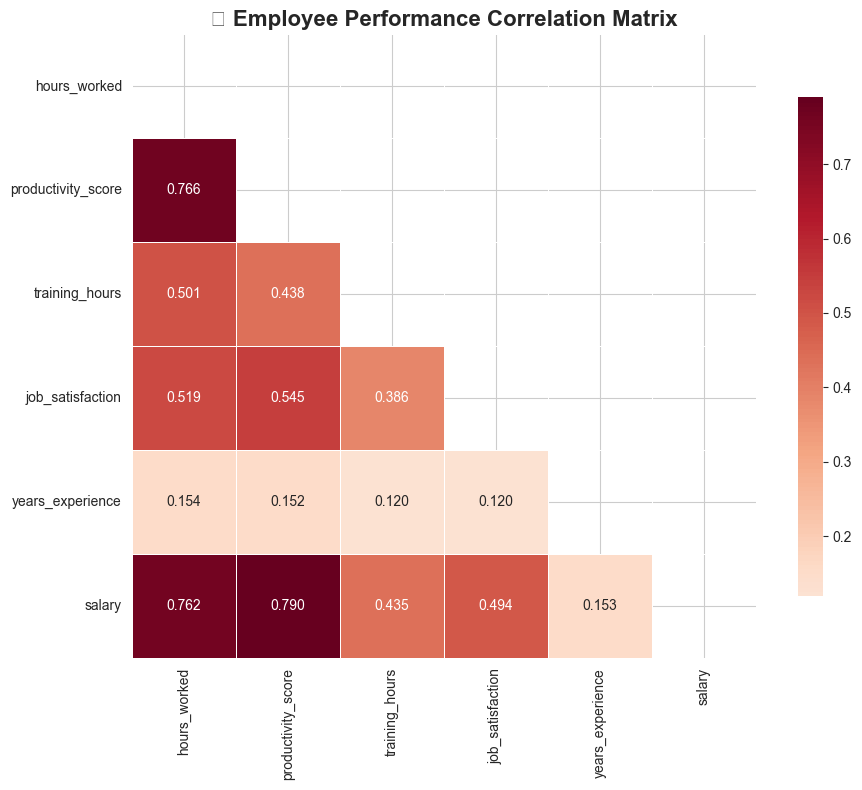

In [8]:
# Create a beautiful correlation heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Hide upper triangle

sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True, 
            fmt='.3f', 
            cbar_kws={"shrink": .8},
            linewidths=0.5)

plt.title('👥 Employee Performance Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [9]:
# Find the strongest relationships
# Get upper triangle of correlation matrix (avoid duplicates)
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
correlations_list = upper_triangle.stack().sort_values(key=abs, ascending=False)

print("🏆 Strongest Relationships (Top 5):")
for i, (variables, corr) in enumerate(correlations_list.head().items()):
    var1, var2 = variables
    strength = "💪 Strong" if abs(corr) > 0.7 else "👍 Moderate" if abs(corr) > 0.5 else "🤏 Weak"
    direction = "positive" if corr > 0 else "negative"
    print(f"   {i+1}. {var1} ↔ {var2}")
    print(f"      r = {corr:+.3f} ({strength} {direction})")
    print()

🏆 Strongest Relationships (Top 5):
   1. productivity_score ↔ salary
      r = +0.790 (💪 Strong positive)

   2. hours_worked ↔ productivity_score
      r = +0.766 (💪 Strong positive)

   3. hours_worked ↔ salary
      r = +0.762 (💪 Strong positive)

   4. productivity_score ↔ job_satisfaction
      r = +0.545 (👍 Moderate positive)

   5. hours_worked ↔ job_satisfaction
      r = +0.519 (👍 Moderate positive)



## 5. Anscombe's Quartet: The Plot Twist

### 5.1 The Most Important Lesson in Data Science

In [8]:
# The famous Anscombe's Quartet
anscombe_data = {
    'x1': [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
    'y1': [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    'x2': [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
    'y2': [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74],
    'x3': [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
    'y3': [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    'x4': [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8],
    'y4': [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]
}

anscombe_df = pd.DataFrame(anscombe_data)

print("🎭 Anscombe's Quartet: The Ultimate Data Surprise")
print("\n📊 Summary Statistics Comparison:")
print("Dataset | Mean X | Mean Y | Std X | Std Y | Correlation")
print("-" * 60)

datasets = [('x1', 'y1'), ('x2', 'y2'), ('x3', 'y3'), ('x4', 'y4')]

for i, (x_col, y_col) in enumerate(datasets, 1):
    x_data = anscombe_df[x_col]
    y_data = anscombe_df[y_col]
    
    mean_x = x_data.mean()
    mean_y = y_data.mean()
    std_x = x_data.std()
    std_y = y_data.std()
    corr = x_data.corr(y_data)
    
    print(f"   {i}    |  {mean_x:.2f}  |  {mean_y:.2f}  | {std_x:.2f}  | {std_y:.2f}  |   {corr:.3f}")

print("\n🤯 SHOCKING: All four datasets have nearly identical statistics!")

🎭 Anscombe's Quartet: The Ultimate Data Surprise

📊 Summary Statistics Comparison:
Dataset | Mean X | Mean Y | Std X | Std Y | Correlation
------------------------------------------------------------
   1    |  9.00  |  7.50  | 3.32  | 2.03  |   0.816
   2    |  9.00  |  7.50  | 3.32  | 2.03  |   0.816
   3    |  9.00  |  7.50  | 3.32  | 2.03  |   0.816
   4    |  9.00  |  7.50  | 3.32  | 2.03  |   0.817

🤯 SHOCKING: All four datasets have nearly identical statistics!


C:\Users\alish\AppData\Local\Temp\ipykernel_9068\30209144.py:32: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from current font.
  plt.tight_layout()
C:\Users\alish\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


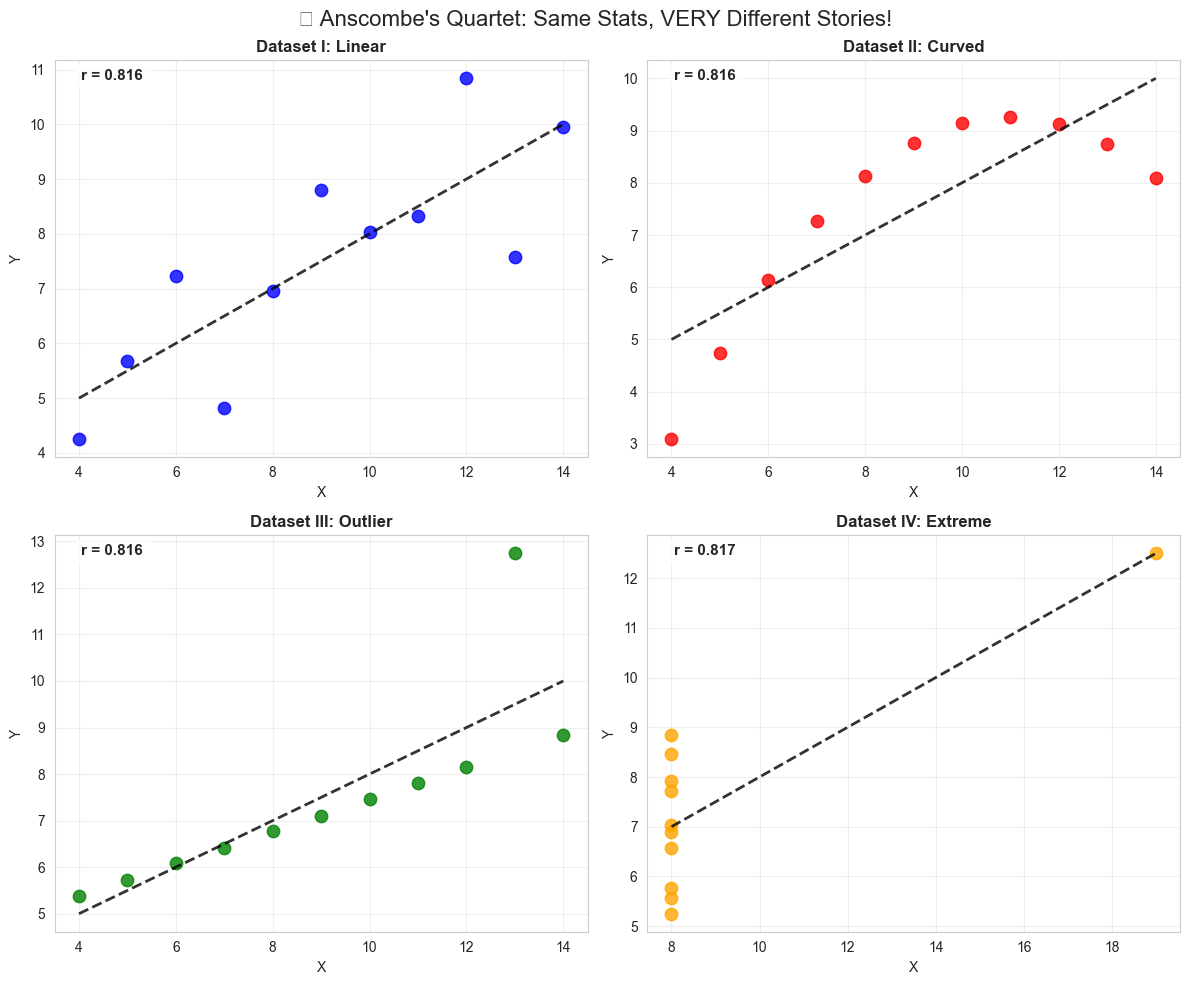

💡 LESSON: ALWAYS visualize your data before making conclusions!
📊 Statistics alone can be misleading - plots reveal the truth!


In [9]:
# Plot the shocking truth
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

colors = ['blue', 'red', 'green', 'orange']
titles = ['Dataset I: Linear', 'Dataset II: Curved', 'Dataset III: Outlier', 'Dataset IV: Extreme']

for i, (x_col, y_col) in enumerate(datasets):
    x_data = anscombe_df[x_col]
    y_data = anscombe_df[y_col]
    
    axes[i].scatter(x_data, y_data, s=80, alpha=0.8, color=colors[i])
    
    # Add best fit line
    z = np.polyfit(x_data, y_data, 1)
    p = np.poly1d(z)
    x_line = np.linspace(x_data.min(), x_data.max(), 100)
    axes[i].plot(x_line, p(x_line), "--", color='black', alpha=0.8, linewidth=2)
    
    axes[i].set_title(titles[i], fontsize=12, fontweight='bold')
    axes[i].set_xlabel('X')
    axes[i].set_ylabel('Y')
    axes[i].grid(True, alpha=0.3)
    
    # Add correlation
    corr = x_data.corr(y_data)
    axes[i].text(0.05, 0.95, f'r = {corr:.3f}', transform=axes[i].transAxes,
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                fontsize=11, fontweight='bold')

plt.suptitle("🎭 Anscombe's Quartet: Same Stats, VERY Different Stories!", fontsize=16)
plt.tight_layout()
plt.show()

print("💡 LESSON: ALWAYS visualize your data before making conclusions!")
print("📊 Statistics alone can be misleading - plots reveal the truth!")

**Exercise 2 — Correlation Traps (medium)**  
Identify which scenarios show spurious correlation (correlation without causation).


In [ ]:
# Your turn - analyze these scenarios
scenarios = [
    "Ice cream sales and drowning incidents (both increase in summer)",
    "Hours studied and exam scores", 
    "Shoe size and reading ability in children",
    "Employee training hours and job performance",
    "Number of firefighters and property damage"
]

# For each scenario, determine:
# 1. Is there likely correlation?
# 2. Is there causation?
# 3. What might be the hidden variable?

analyses = [
    {
        'scenario': "Ice cream sales and drowning incidents",
        'correlation': "YES - both increase together",
        'causation': "NO - ice cream doesn't cause drowning!",
        'hidden_variable': "Temperature/Season (hot weather increases both)",
        'type': "SPURIOUS"
    },
    {
        'scenario': "Hours studied and exam scores",
        'correlation': "YES - more study, higher scores",
        'causation': "LIKELY - studying does improve performance",
        'hidden_variable': "Student motivation, prior knowledge",
        'type': "REAL"
    },
    {
        'scenario': "Shoe size and reading ability in children",
        'correlation': "YES - bigger feet, better reading",
        'causation': "NO - feet don't help you read!",
        'hidden_variable': "Age (older kids have bigger feet AND read better)",
        'type': "SPURIOUS"
    },
    {
        'scenario': "Employee training and job performance",
        'correlation': "YES - more training, better performance",
        'causation': "LIKELY - training develops skills",
        'hidden_variable': "Employee motivation, initial ability",
        'type': "REAL"
    },
    {
        'scenario': "Number of firefighters and property damage",
        'correlation': "YES - more firefighters, more damage",
        'causation': "NO - firefighters don't cause damage!",
        'hidden_variable': "Fire severity (bigger fires need more firefighters AND cause more damage)",
        'type': "SPURIOUS"
    }
]

for i, analysis in enumerate(analyses, 1):
    print(f"{i}. {analysis['scenario']} {analysis['type']}")
    print(f"   Correlation: {analysis['correlation']}")
    print(f"   Causation: {analysis['causation']}")
    print(f"   Hidden factor: {analysis['hidden_variable']}")
    

<details>
<summary><b>Solution</b></summary>

```python
print("🕵️ Correlation vs Causation Analysis:")
print()

analyses = [
    {
        'scenario': "Ice cream sales and drowning incidents",
        'correlation': "YES - both increase together",
        'causation': "NO - ice cream doesn't cause drowning!",
        'hidden_variable': "Temperature/Season (hot weather increases both)",
        'type': "🚨 SPURIOUS"
    },
    {
        'scenario': "Hours studied and exam scores",
        'correlation': "YES - more study, higher scores",
        'causation': "LIKELY - studying does improve performance",
        'hidden_variable': "Student motivation, prior knowledge",
        'type': "✅ REAL"
    },
    {
        'scenario': "Shoe size and reading ability in children",
        'correlation': "YES - bigger feet, better reading",
        'causation': "NO - feet don't help you read!",
        'hidden_variable': "Age (older kids have bigger feet AND read better)",
        'type': "🚨 SPURIOUS"
    },
    {
        'scenario': "Employee training and job performance",
        'correlation': "YES - more training, better performance",
        'causation': "LIKELY - training develops skills",
        'hidden_variable': "Employee motivation, initial ability",
        'type': "✅ REAL"
    },
    {
        'scenario': "Number of firefighters and property damage",
        'correlation': "YES - more firefighters, more damage",
        'causation': "NO - firefighters don't cause damage!",
        'hidden_variable': "Fire severity (bigger fires need more firefighters AND cause more damage)",
        'type': "🚨 SPURIOUS"
    }
]

for i, analysis in enumerate(analyses, 1):
    print(f"{i}. {analysis['scenario']} {analysis['type']}")
    print(f"   Correlation: {analysis['correlation']}")
    print(f"   Causation: {analysis['causation']}")
    print(f"   Hidden factor: {analysis['hidden_variable']}")
    print()

print("💡 Key insight: Always look for hidden variables that might explain both!")
```
</details>

## 6. Advanced Correlation Analysis

### 6.1 How Outliers Can Fool You

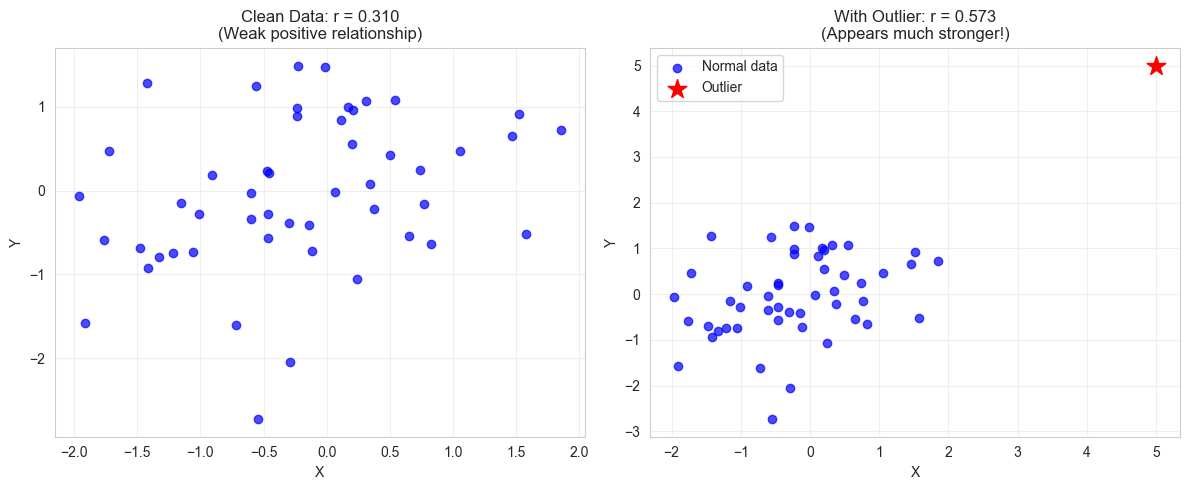

🎯 Outlier Impact Analysis:
   Without outlier: r = +0.310
   With outlier:    r = +0.573
   Change:          +0.263

⚠️  One outlier completely changed our conclusion!


In [10]:
# Demonstrate outlier impact
np.random.seed(42)
x_clean = np.random.normal(0, 1, 50)
y_clean = 0.2 * x_clean + np.random.normal(0, 1, 50)

# Add a powerful outlier
x_with_outlier = np.append(x_clean, 5)
y_with_outlier = np.append(y_clean, 5)

corr_clean = np.corrcoef(x_clean, y_clean)[0,1]
corr_with_outlier = np.corrcoef(x_with_outlier, y_with_outlier)[0,1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Clean data
ax1.scatter(x_clean, y_clean, alpha=0.7, color='blue')
ax1.set_title(f'Clean Data: r = {corr_clean:.3f}\n(Weak positive relationship)')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.grid(True, alpha=0.3)

# With outlier
ax2.scatter(x_clean, y_clean, alpha=0.7, color='blue', label='Normal data')
ax2.scatter([5], [5], color='red', s=200, label='Outlier', marker='*')
ax2.set_title(f'With Outlier: r = {corr_with_outlier:.3f}\n(Appears much stronger!)')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"🎯 Outlier Impact Analysis:")
print(f"   Without outlier: r = {corr_clean:+.3f}")
print(f"   With outlier:    r = {corr_with_outlier:+.3f}")
print(f"   Change:          {corr_with_outlier - corr_clean:+.3f}")
print(f"\n⚠️  One outlier completely changed our conclusion!")

### 6.2 Non-Linear Relationships

C:\Users\alish\AppData\Local\Temp\ipykernel_9068\1115272968.py:7: RuntimeWarning: invalid value encountered in sqrt
  y_circle = np.sqrt(4 - x**2) + np.random.normal(0, 0.2, 100)
C:\Users\alish\AppData\Local\Temp\ipykernel_9068\1115272968.py:36: UserWarning: Glyph 127744 (\N{CYCLONE}) missing from current font.
  plt.tight_layout()
C:\Users\alish\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127744 (\N{CYCLONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


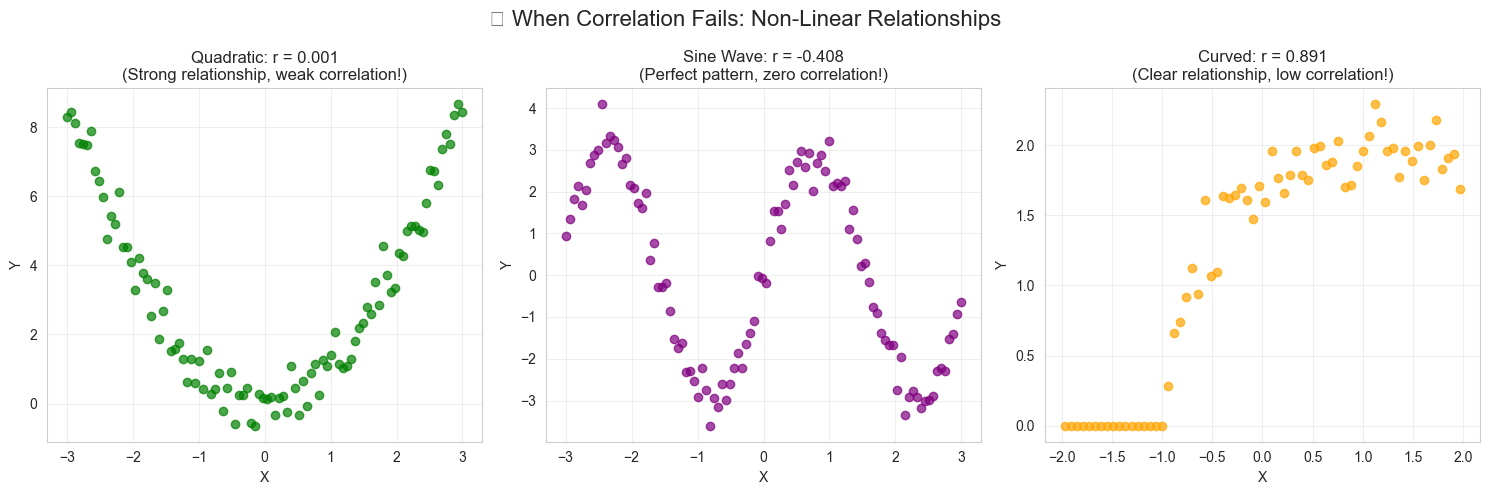

💡 LESSON: Correlation only measures LINEAR relationships!
📊 Always plot your data to see the full picture!


In [11]:
# Show when correlation fails
x = np.linspace(-3, 3, 100)

# Create non-linear relationships
y_quadratic = x**2 + np.random.normal(0, 0.5, 100)
y_sine = 3 * np.sin(2*x) + np.random.normal(0, 0.3, 100)
y_circle = np.sqrt(4 - x**2) + np.random.normal(0, 0.2, 100)
y_circle = np.where(np.isnan(y_circle), 0, y_circle)  # Handle NaN values

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Quadratic
axes[0].scatter(x, y_quadratic, alpha=0.7, color='green')
axes[0].set_title(f'Quadratic: r = {np.corrcoef(x, y_quadratic)[0,1]:.3f}\n(Strong relationship, weak correlation!)')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
axes[0].grid(True, alpha=0.3)

# Sine wave
axes[1].scatter(x, y_sine, alpha=0.7, color='purple')
axes[1].set_title(f'Sine Wave: r = {np.corrcoef(x, y_sine)[0,1]:.3f}\n(Perfect pattern, zero correlation!)')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')
axes[1].grid(True, alpha=0.3)

# Circular
x_circle = x[abs(x) <= 2]  # Limit to valid range
y_circle = y_circle[:len(x_circle)]
axes[2].scatter(x_circle, y_circle, alpha=0.7, color='orange')
axes[2].set_title(f'Curved: r = {np.corrcoef(x_circle, y_circle)[0,1]:.3f}\n(Clear relationship, low correlation!)')
axes[2].set_xlabel('X')
axes[2].set_ylabel('Y')
axes[2].grid(True, alpha=0.3)

plt.suptitle('🌀 When Correlation Fails: Non-Linear Relationships', fontsize=16)
plt.tight_layout()
plt.show()

print("💡 LESSON: Correlation only measures LINEAR relationships!")
print("📊 Always plot your data to see the full picture!")

**Exercise 3 — Real Business Analysis (hard)**  
Analyze marketing campaign effectiveness using correlation analysis.


In [ ]:
# Marketing campaign dataset
np.random.seed(789)
n_campaigns = 100

marketing_data = pd.DataFrame({
    'ad_spend': np.random.exponential(5000, n_campaigns),
    'social_media_followers': np.random.poisson(10000, n_campaigns),
    'email_opens': np.random.poisson(2000, n_campaigns),
    'website_traffic': np.random.poisson(5000, n_campaigns),
    'conversions': np.random.poisson(100, n_campaigns),
    'revenue': np.random.exponential(15000, n_campaigns)
})

# Add realistic relationships
marketing_data['website_traffic'] += (marketing_data['ad_spend'] / 2).astype(int)
marketing_data['conversions'] += (marketing_data['website_traffic'] / 80).astype(int)
marketing_data['revenue'] += marketing_data['conversions'] * 50

print(f"📊 Marketing Dataset: {marketing_data.shape}")
print(marketing_data.head())

# Your tasks:
# 1. Create correlation matrix and heatmap
# 2. Find the top 3 strongest correlations
# 3. Create scatter plots for strongest relationships
# 4. Identify which correlations likely represent causation

# Task 1: Correlation matrix and heatmap
marketing_corr = marketing_data.corr()
print("Task 1 - Marketing Correlation Matrix:")
print(marketing_corr.round(3))

plt.figure(figsize=(10, 8))
sns.heatmap(marketing_corr, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.3f', cbar_kws={"shrink": .8})
plt.title('Marketing Campaign Correlation Matrix')
plt.tight_layout()
plt.show()

# Task 2: Find strongest correlations
upper_tri = marketing_corr.where(np.triu(np.ones(marketing_corr.shape), k=1).astype(bool))
strong_corrs = upper_tri.stack().sort_values(key=abs, ascending=False)

print("\n Task 2 - Top 3 Strongest Relationships:")
for i, (variables, corr) in enumerate(strong_corrs.head(3).items()):
    var1, var2 = variables
    print(f"   {i+1}. {var1} ↔ {var2}: r = {corr:+.3f}")

# Task 3: Scatter plots
print("\n Task 3 - Scatter Plots for Strongest Relationships:")
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, (variables, corr) in enumerate(strong_corrs.head(3).items()):
    var1, var2 = variables
    axes[i].scatter(marketing_data[var1], marketing_data[var2], alpha=0.6)
    axes[i].set_xlabel(var1.replace('_', ' ').title())
    axes[i].set_ylabel(var2.replace('_', ' ').title())
    axes[i].set_title(f'{var1} vs {var2}\nr = {corr:.3f}')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Task 4: Causation analysis
print("\n Task 4 - Causation Analysis:")
causation_likely = [
    ("ad_spend", "website_traffic", " IKELY - ads drive traffic"),
    ("website_traffic", "conversions", "LIKELY - more visitors → more conversions"),
    ("conversions", "revenue", "LIKELY - conversions directly generate revenue")
]

for var1, var2, analysis in causation_likely:
    if var1 in marketing_data.columns and var2 in marketing_data.columns:
        corr = marketing_data[var1].corr(marketing_data[var2])
        print(f"   {var1} → {var2}: r = {corr:.3f} {analysis}")

print("\n Business Insights:")
print("   • Focus ad spend on channels that drive website traffic")
print("   • Optimize website to improve conversion rates")
print("   • Monitor the traffic → conversion → revenue funnel")


<details>
<summary><b>Solution</b></summary>

```python
# Task 1: Correlation matrix and heatmap
marketing_corr = marketing_data.corr()
print("📊 Task 1 - Marketing Correlation Matrix:")
print(marketing_corr.round(3))

plt.figure(figsize=(10, 8))
sns.heatmap(marketing_corr, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.3f', cbar_kws={"shrink": .8})
plt.title('📈 Marketing Campaign Correlation Matrix')
plt.tight_layout()
plt.show()

# Task 2: Find strongest correlations
upper_tri = marketing_corr.where(np.triu(np.ones(marketing_corr.shape), k=1).astype(bool))
strong_corrs = upper_tri.stack().sort_values(key=abs, ascending=False)

print("\n🏆 Task 2 - Top 3 Strongest Relationships:")
for i, (variables, corr) in enumerate(strong_corrs.head(3).items()):
    var1, var2 = variables
    print(f"   {i+1}. {var1} ↔ {var2}: r = {corr:+.3f}")

# Task 3: Scatter plots
print("\n📊 Task 3 - Scatter Plots for Strongest Relationships:")
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, (variables, corr) in enumerate(strong_corrs.head(3).items()):
    var1, var2 = variables
    axes[i].scatter(marketing_data[var1], marketing_data[var2], alpha=0.6)
    axes[i].set_xlabel(var1.replace('_', ' ').title())
    axes[i].set_ylabel(var2.replace('_', ' ').title())
    axes[i].set_title(f'{var1} vs {var2}\nr = {corr:.3f}')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Task 4: Causation analysis
print("\n🔍 Task 4 - Causation Analysis:")
causation_likely = [
    ("ad_spend", "website_traffic", "✅ LIKELY - ads drive traffic"),
    ("website_traffic", "conversions", "✅ LIKELY - more visitors → more conversions"),
    ("conversions", "revenue", "✅ LIKELY - conversions directly generate revenue")
]

for var1, var2, analysis in causation_likely:
    if var1 in marketing_data.columns and var2 in marketing_data.columns:
        corr = marketing_data[var1].corr(marketing_data[var2])
        print(f"   {var1} → {var2}: r = {corr:.3f} {analysis}")

print("\n💡 Business Insights:")
print("   • Focus ad spend on channels that drive website traffic")
print("   • Optimize website to improve conversion rates")
print("   • Monitor the traffic → conversion → revenue funnel")
```
</details>

## 7. Mini-Challenges
- **M1 (easy):** Create a correlation analysis dashboard for customer satisfaction data
- **M2 (medium):** Build an outlier detection system using correlation analysis
- **M3 (hard):** Design a causation investigation framework for business decisions

In [ ]:
# Your turn - try the challenges!
# M1 Data: Customer satisfaction scores, service quality, price, delivery time
# M2 Data: Detect unusual patterns in employee performance data
# M3 Data: Investigate whether training programs actually improve performance

# M1 - Customer Satisfaction Dashboard
np.random.seed(111)
customer_data = pd.DataFrame({
    'satisfaction': np.random.normal(7, 1.5, 200),
    'service_quality': np.random.normal(8, 1, 200),
    'price_rating': np.random.normal(6, 2, 200),
    'delivery_speed': np.random.normal(7.5, 1.2, 200)
})

# Add realistic relationships
customer_data['satisfaction'] += 0.5 * customer_data['service_quality'] + 0.3 * customer_data['delivery_speed']
customer_data = customer_data.clip(1, 10)  # Keep ratings in 1-10 range

print("M1 - Customer Satisfaction Analysis:")
corr_matrix = customer_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu_r', center=0, square=True)
plt.title('Customer Satisfaction Correlation Matrix')
plt.show()

strongest_factor = corr_matrix['satisfaction'].drop('satisfaction').abs().idxmax()
strongest_corr = corr_matrix['satisfaction'][strongest_factor]
print(f"Strongest driver of satisfaction: {strongest_factor} (r = {strongest_corr:.3f})")

# M2 - Outlier Detection using Correlation
def detect_correlation_outliers(data, threshold=0.1):
    """Find data points that don't follow expected correlations"""
    outliers = []
    
    for idx in data.index:
        # Calculate correlation with and without this point
        full_corr = data.iloc[:, 0].corr(data.iloc[:, 1])
        without_point = data.drop(idx)
        reduced_corr = without_point.iloc[:, 0].corr(without_point.iloc[:, 1])
        
        if abs(full_corr - reduced_corr) > threshold:
            outliers.append((idx, abs(full_corr - reduced_corr)))
    
    return sorted(outliers, key=lambda x: x[1], reverse=True)

print("\n M2 - Outlier Detection:")
test_data = employee_data[['hours_worked', 'productivity_score']].copy()
outliers = detect_correlation_outliers(test_data)
print(f"Found {len(outliers)} potential outliers")
if outliers:
    print(f"Most influential outlier: Employee {outliers[0][0]} (impact: {outliers[0][1]:.3f})")

# M3 - Causation Investigation Framework
def investigate_causation(data, cause_var, effect_var, confounders=None):
    """Framework for investigating potential causation"""
    print(f"\n M3 - Causation Investigation: {cause_var} → {effect_var}")
    
    # 1. Basic correlation
    basic_corr = data[cause_var].corr(data[effect_var])
    print(f"1. Basic correlation: r = {basic_corr:.3f}")
    
    # 2. Check for confounders
    if confounders:
        for confounder in confounders:
            cause_conf = data[cause_var].corr(data[confounder])
            effect_conf = data[effect_var].corr(data[confounder])
            print(f"2. Confounder {confounder}: cause r={cause_conf:.3f}, effect r={effect_conf:.3f}")
    
    # 3. Temporal logic check
    print(f"3. Temporal logic: Does {cause_var} precede {effect_var}? [Manual check needed]")
    
    # 4. Strength assessment
    if abs(basic_corr) > 0.7:
        strength = "Strong evidence"
    elif abs(basic_corr) > 0.5:
        strength = "Moderate evidence"
    elif abs(basic_corr) > 0.3:
        strength = "Weak evidence"
    else:
        strength = "Insufficient evidence"
    
    print(f"4. Conclusion: {strength} for causation")
    return basic_corr

# Test the framework
investigate_causation(employee_data, 'training_hours', 'productivity_score', 
                     confounders=['years_experience', 'salary'])


<details>
<summary><b>Solutions</b></summary>

```python
# M1 - Customer Satisfaction Dashboard
np.random.seed(111)
customer_data = pd.DataFrame({
    'satisfaction': np.random.normal(7, 1.5, 200),
    'service_quality': np.random.normal(8, 1, 200),
    'price_rating': np.random.normal(6, 2, 200),
    'delivery_speed': np.random.normal(7.5, 1.2, 200)
})

# Add realistic relationships
customer_data['satisfaction'] += 0.5 * customer_data['service_quality'] + 0.3 * customer_data['delivery_speed']
customer_data = customer_data.clip(1, 10)  # Keep ratings in 1-10 range

print("😊 M1 - Customer Satisfaction Analysis:")
corr_matrix = customer_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu_r', center=0, square=True)
plt.title('Customer Satisfaction Correlation Matrix')
plt.show()

strongest_factor = corr_matrix['satisfaction'].drop('satisfaction').abs().idxmax()
strongest_corr = corr_matrix['satisfaction'][strongest_factor]
print(f"Strongest driver of satisfaction: {strongest_factor} (r = {strongest_corr:.3f})")

# M2 - Outlier Detection using Correlation
def detect_correlation_outliers(data, threshold=0.1):
    """Find data points that don't follow expected correlations"""
    outliers = []
    
    for idx in data.index:
        # Calculate correlation with and without this point
        full_corr = data.iloc[:, 0].corr(data.iloc[:, 1])
        without_point = data.drop(idx)
        reduced_corr = without_point.iloc[:, 0].corr(without_point.iloc[:, 1])
        
        if abs(full_corr - reduced_corr) > threshold:
            outliers.append((idx, abs(full_corr - reduced_corr)))
    
    return sorted(outliers, key=lambda x: x[1], reverse=True)

print("\n🔍 M2 - Outlier Detection:")
test_data = employee_data[['hours_worked', 'productivity_score']].copy()
outliers = detect_correlation_outliers(test_data)
print(f"Found {len(outliers)} potential outliers")
if outliers:
    print(f"Most influential outlier: Employee {outliers[0][0]} (impact: {outliers[0][1]:.3f})")

# M3 - Causation Investigation Framework
def investigate_causation(data, cause_var, effect_var, confounders=None):
    """Framework for investigating potential causation"""
    print(f"\n🔬 M3 - Causation Investigation: {cause_var} → {effect_var}")
    
    # 1. Basic correlation
    basic_corr = data[cause_var].corr(data[effect_var])
    print(f"1. Basic correlation: r = {basic_corr:.3f}")
    
    # 2. Check for confounders
    if confounders:
        for confounder in confounders:
            cause_conf = data[cause_var].corr(data[confounder])
            effect_conf = data[effect_var].corr(data[confounder])
            print(f"2. Confounder {confounder}: cause r={cause_conf:.3f}, effect r={effect_conf:.3f}")
    
    # 3. Temporal logic check
    print(f"3. Temporal logic: Does {cause_var} precede {effect_var}? [Manual check needed]")
    
    # 4. Strength assessment
    if abs(basic_corr) > 0.7:
        strength = "Strong evidence"
    elif abs(basic_corr) > 0.5:
        strength = "Moderate evidence"
    elif abs(basic_corr) > 0.3:
        strength = "Weak evidence"
    else:
        strength = "Insufficient evidence"
    
    print(f"4. Conclusion: {strength} for causation")
    return basic_corr

# Test the framework
investigate_causation(employee_data, 'training_hours', 'productivity_score', 
                     confounders=['years_experience', 'salary'])
```
</details>

## Wrap-Up & Next Steps
✅ You understand correlation vs causation (the most important lesson!)  
✅ You can calculate and interpret correlation coefficients  
✅ You've mastered correlation matrices and heatmaps  
✅ You know Anscombe's Quartet and why visualization is crucial  
✅ You can spot outliers and non-linear relationships  

**Quick Reference Card:**
- 📊 **Correlation range**: -1 to +1 (strength and direction)
- ⚠️ **Golden rule**: Correlation ≠ Causation!
- 🎯 **Strong**: |r| > 0.7, **Moderate**: |r| > 0.5, **Weak**: |r| > 0.3
- 👁️ **Always visualize**: Anscombe's Quartet proves this!
- 🔍 **Watch for**: Outliers, non-linear patterns, spurious correlations

**Next:** Sampling and Populations - Learn how to make big conclusions from small samples!
